In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import pickle

In [5]:
with open("../output_preprocessing/positive.pkl", "rb") as f:   # rb = read-binary
    data = pickle.load(f)

with open("../output_preprocessing/negative.pkl", "rb") as f:   # rb = read-binary
    data2 = pickle.load(f)

In [41]:
def join_tokens(processed_text):
    joined_tokenized_texts = []
    for tokenised_text in processed_text:
        joined_tokenized_texts.append(' '.join(tokenised_text))
    return joined_tokenized_texts
        
positive = join_tokens(data)       
negative = join_tokens(data2)    

processed_data = positive+negative
labels = len(positive)*[1]+len(negative)*[0]

In [15]:
# Assuming you have labels in 'labels' list
X_train, X_test, y_train, y_test = train_test_split(processed_data, labels, test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=20, ngram_range=(1,3))  # Adjust max_features as needed

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the classifier (SVM for example)
classifier = SVC(probability=True)
classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a detailed classification report
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    processed_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- Define candidate models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=10),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}

# --- Evaluate each model ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results[name] = {"Accuracy": acc, "ROC_AUC": auc}

# --- Show results ---
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 203565 stored elements and shape (28661, 20)>

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# --- Example inputs ---
# processed_data = pd.Series(["good movie", "bad film", "excellent acting"])  # tokenized/preprocessed text
# labels = [1, 0, 1]  # binary labels

# --- Vectorize text ---
vectorizer = TfidfVectorizer()   # or CountVectorizer(), HashingVectorizer(), etc.
X = vectorizer.fit_transform(processed_data)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42, stratify=labels
)

# --- Define classifiers ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": MultinomialNB(),      # suited for text
    "KNN": KNeighborsClassifier()
}

results = {}

# --- Evaluate each model ---
for name, model in models.items():
    model.fit(, y_train)
    y_pred = model.predict(X_test)

    # Some classifiers (like SVC without probability=True) don’t support predict_proba
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {"Accuracy": acc, "ROC_AUC": auc}

# --- Display results ---
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy   ROC_AUC
Logistic Regression  0.844683  0.916685
Random Forest        0.836589  0.908662
Gradient Boosting    0.845241  0.914040
SVM                  0.850126  0.919321
Naive Bayes          0.818727  0.891703
KNN                  0.764862  0.820418


## hyper parametrisation using linear regression

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Example: X = tokenized/preprocessed texts, y = labels

# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', LogisticRegression(max_iter=1000))
])

# Define parameter grid for optimization
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)],   # unigrams vs unigrams+bigrams
    'tfidf__min_df': [1, 5],                # min frequency cutoff
    'clf__C': [0.01, 0.1, 1, 10],           # regularization strength
    'clf__penalty': ['l 2'],                 # l1 only works with saga solver
    'clf__solver': ['liblinear', 'lbfgs', 'saga']
}

# Grid search with cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val score:", grid.best_score_)


Best parameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best cross-val score: 0.8399918981316649


Cross-validation accuracies: [0.84482277 0.84259001 0.83840357 0.83086799 0.85152107 0.84817192
 0.84259001 0.8453378  0.8305416  0.84561697]
Mean accuracy: 0.8420 ± 0.0066

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3734
           1       0.82      0.88      0.85      3432

    accuracy                           0.85      7166
   macro avg       0.85      0.85      0.85      7166
weighted avg       0.85      0.85      0.85      7166


Confusion Matrix:
[[3063  671]
 [ 401 3031]]

ROC AUC Score: 0.9183


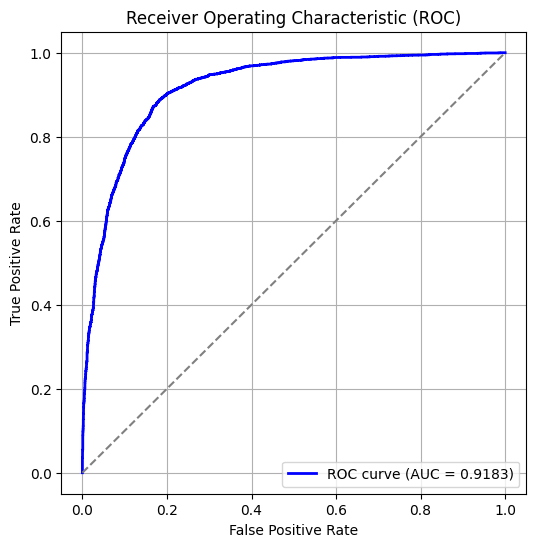

Text: Selecting reference genes RT qPCR based equivalence tests ne...
 True: 0, Pred: 0, Prob: 0.3577

Text: Implementation costs community health worker delivered weigh...
 True: 0, Pred: 0, Prob: 0.0369

Text: phosphorylation GENE promotes DISEASE cell migration invasio...
 True: 1, Pred: 1, Prob: 0.9801

Text: Competing endogenous RNA networks DISEASE function mechanism...
 True: 0, Pred: 0, Prob: 0.1803

Text: Late occurrence DISEASE anti CD19 chimeric antigen receptor ...
 True: 0, Pred: 1, Prob: 0.5324

Text: Phase trial GENE inhibitor DRUG combined GENE inhibitor DRUG...
 True: 1, Pred: 1, Prob: 0.7837

Text: DISEASE evaluation new geriatric syndrome BACKGROUND DISEASE...
 True: 0, Pred: 0, Prob: 0.0796

Text: GENE__/-catenin signaling stimulated GENE DISEASE melanocyte...
 True: 1, Pred: 1, Prob: 0.8192

Text: Improving diagnosis DISEASE...
 True: 0, Pred: 0, Prob: 0.0841

Text: Genetic basis DISEASE management metabolic complications Sel...
 True: 1, Pred: 1, Prob: 0.9875



In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

# ---------------------------
# Step 1: Split dataset
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    processed_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# ---------------------------
# Step 2: Define pipeline
# ---------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, ngram_range=(1, 2))),
    ('clf', LogisticRegression(
        C=10,
        penalty='l2',
        solver='liblinear',
        random_state=42
    ))
])

# ---------------------------
# Step 3: Cross-validation
# ---------------------------
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy scores for each fold
cv_scores = cross_val_score(pipeline, processed_data, labels, cv=cv, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean accuracy: {:.4f} ± {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

# ---------------------------
# Step 4: Train model
# ---------------------------
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # probability for positive class

# ---------------------------
# Step 5: Performance metrics
# ---------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC AUC Score: {:.4f}".format(roc_auc))

# ---------------------------
# Step 6: ROC Curve
# ---------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ---------------------------
# Step 7: Show prediction probabilities
# ---------------------------
for text, true_label, pred_label, prob in zip(X_test[:10], y_test[:10], y_pred[:10], y_proba[:10]):
    print(f"Text: {text[:60]}...")  # print first 60 chars
    print(f" True: {true_label}, Pred: {pred_label}, Prob: {prob:.4f}\n")


In [50]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assume you already trained your model: model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Define cutoffs to test
cutoffs = [0.5, 0.4, 0.3, 0.2, 0.1]

for cutoff in cutoffs:
    print(f"\nCutoff = {cutoff}")
    
    # Apply cutoff
    y_pred = (y_proba >= cutoff).astype(int)
    
    # Show confusion matrix and report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))



Cutoff = 0.5
Confusion Matrix:
[[3063  671]
 [ 401 3031]]

Classification Report:
              precision    recall  f1-score   support

           0      0.884     0.820     0.851      3734
           1      0.819     0.883     0.850      3432

    accuracy                          0.850      7166
   macro avg      0.851     0.852     0.850      7166
weighted avg      0.853     0.850     0.850      7166


Cutoff = 0.4
Confusion Matrix:
[[2925  809]
 [ 306 3126]]

Classification Report:
              precision    recall  f1-score   support

           0      0.905     0.783     0.840      3734
           1      0.794     0.911     0.849      3432

    accuracy                          0.844      7166
   macro avg      0.850     0.847     0.844      7166
weighted avg      0.852     0.844     0.844      7166


Cutoff = 0.3
Confusion Matrix:
[[2751  983]
 [ 226 3206]]

Classification Report:
              precision    recall  f1-score   support

           0      0.924     0.737     0.82

Cross-validation accuracies: [0.84482277 0.84259001 0.83840357 0.83086799 0.85152107 0.84817192
 0.84259001 0.8453378  0.8305416  0.84561697]
Mean accuracy: 0.8420 ± 0.0066

=== Default Cutoff (0.5) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3734
           1       0.82      0.88      0.85      3432

    accuracy                           0.85      7166
   macro avg       0.85      0.85      0.85      7166
weighted avg       0.85      0.85      0.85      7166

Confusion Matrix:
[[3063  671]
 [ 401 3031]]
ROC AUC Score: 0.9183

=== Custom Cutoff (0.3) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3734
           1       0.77      0.93      0.84      3432

    accuracy                           0.83      7166
   macro avg       0.84      0.84      0.83      7166
weighted avg       0.85      0.83      0.83      7166

C

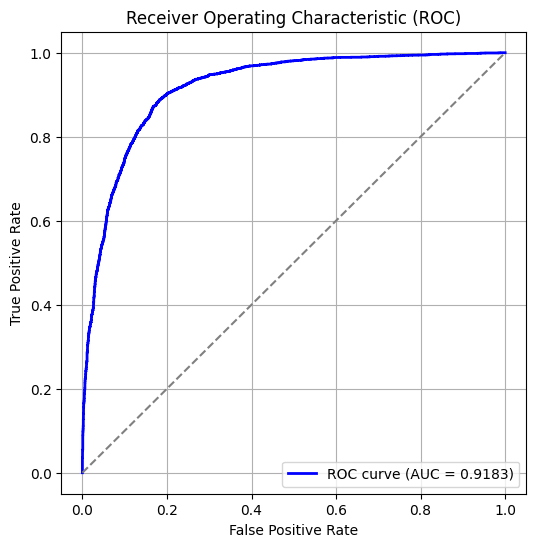

Text: Selecting reference genes RT qPCR based equivalence tests ne...
 True: 0, Prob: 0.3577, Pred@0.5: 0, Pred@0.3: 1

Text: Implementation costs community health worker delivered weigh...
 True: 0, Prob: 0.0369, Pred@0.5: 0, Pred@0.3: 0

Text: phosphorylation GENE promotes DISEASE cell migration invasio...
 True: 1, Prob: 0.9801, Pred@0.5: 1, Pred@0.3: 1

Text: Competing endogenous RNA networks DISEASE function mechanism...
 True: 0, Prob: 0.1803, Pred@0.5: 0, Pred@0.3: 0

Text: Late occurrence DISEASE anti CD19 chimeric antigen receptor ...
 True: 0, Prob: 0.5324, Pred@0.5: 1, Pred@0.3: 1

Text: Phase trial GENE inhibitor DRUG combined GENE inhibitor DRUG...
 True: 1, Prob: 0.7837, Pred@0.5: 1, Pred@0.3: 1

Text: DISEASE evaluation new geriatric syndrome BACKGROUND DISEASE...
 True: 0, Prob: 0.0796, Pred@0.5: 0, Pred@0.3: 0

Text: GENE__/-catenin signaling stimulated GENE DISEASE melanocyte...
 True: 1, Prob: 0.8192, Pred@0.5: 1, Pred@0.3: 1

Text: Improving diagnosis DISEASE...
 Tr

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

# ---------------------------
# Step 1: Split dataset
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    processed_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# ---------------------------
# Step 2: Define pipeline
# ---------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, ngram_range=(1, 2))),
    ('clf', LogisticRegression(
        C=10,
        penalty='l2',
        solver='liblinear',
        random_state=42
    ))
])

# ---------------------------
# Step 3: Cross-validation
# ---------------------------
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, processed_data, labels, cv=cv, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean accuracy: {:.4f} ± {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

# ---------------------------
# Step 4: Train model
# ---------------------------
pipeline.fit(X_train, y_train)

# Probabilities
y_proba = pipeline.predict_proba(X_test)[:, 1]

# ---------------------------
# Step 5a: Default prediction (cutoff = 0.5)
# ---------------------------
y_pred_default = (y_proba >= 0.5).astype(int)

print("\n=== Default Cutoff (0.5) ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_default))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_proba)))

# ---------------------------
# Step 5b: Custom cutoff (e.g., 0.3)
# ---------------------------
cutoff = 0.3
y_pred_custom = (y_proba >= cutoff).astype(int)

print(f"\n=== Custom Cutoff ({cutoff}) ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

# ---------------------------
# Step 6: ROC Curve
# ---------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ---------------------------
# Step 7: Show some predictions with probabilities
# ---------------------------
for text, true_label, prob, pred_default, pred_custom in zip(
    X_test[:10], y_test[:10], y_proba[:10], y_pred_default[:10], y_pred_custom[:10]
):
    print(f"Text: {text[:60]}...")
    print(f" True: {true_label}, Prob: {prob:.4f}, "
          f"Pred@0.5: {pred_default}, Pred@{cutoff}: {pred_custom}\n")
